In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

# import datetime class from datetime module

from datetime import datetime

In [2]:
# Load the Loan data

loans = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\KNN\loan_data.csv", header=0)
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
# Display the Loan data information

loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
# Change the name of variable

loans = loans.rename(columns = {'not.fully.paid': 'NFPaid'}, inplace = False)
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,NFPaid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
# Count the target or dependent variable by '0' & '1' and 
# their proportion (> 10 : 1, then the dataset is imbalance dataset)

Target_count = loans.NFPaid.value_counts()
print('Class 0:', Target_count[0])
print('Class 1:', Target_count[1])
print('Proportion:', round(Target_count[0] / Target_count[1], 2), ': 1')
print('Total loans Trans:', len(loans))

Class 0: 8045
Class 1: 1533
Proportion: 5.25 : 1
Total loans Trans: 9578


In [6]:
# Displaying Duplicate values with in Loan dataset, if avialble

loans_dup = loans[loans.duplicated(keep='last')]
loans_dup

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,NFPaid


In [7]:
# Count the missing values by each variable, if available

loans.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
NFPaid               0
dtype: int64

In [8]:
# Copy the file to backup

loans_bk = loans.copy()

In [9]:
# Apply dummy variable function on 'purpose' categorical variable

cat_cols = ['purpose']

loans = pd.get_dummies(loans,columns=cat_cols)
loans=pd.DataFrame(loans)
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,NFPaid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [10]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in loans.columns:
    if col != 'NFPaid':
        IndepVar.append(col)

TargetVar = 'NFPaid'

x = loans[IndepVar]
y = loans[TargetVar]

In [11]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [12]:
# Display all the variable in the loan dataset

loans.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'NFPaid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

In [13]:
# Identify variable which are suppose to normilize the values

sc_cols = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']

In [14]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[sc_cols] = mmscaler.fit_transform(x_train[sc_cols])
x_train = pd.DataFrame(x_train)

x_test[sc_cols] = mmscaler.fit_transform(x_test[sc_cols])
x_test = pd.DataFrame(x_test)

In [15]:
# Load the result dataset for KNN

loans_results = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\KNN\LoanResults.csv", header=0)
loans_results.head()

,Model Name,KNN K Value,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# KNN Algorithm

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 104  362]
 [ 332 2076]]
Outcome values : 
 104 362 332 2076
Classification report : 
               precision    recall  f1-score   support

           1       0.24      0.22      0.23       466
           0       0.85      0.86      0.86      2408

    accuracy                           0.76      2874
   macro avg       0.55      0.54      0.54      2874
weighted avg       0.75      0.76      0.76      2874

Accuracy : 75.9 %
Precision : 23.9 %
Recall : 22.3 %
F1 Score : 0.231
Specificity or True Negative Rate : 86.2 %
Balanced Accuracy : 54.2 %
MCC : 0.088
roc_auc_score: 0.543


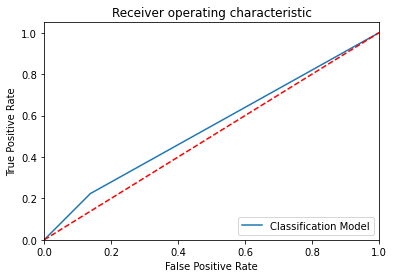

-----------------------------------------------------------------------------------------------------
KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[  15  451]
 [  66 2342]]
Outcome values : 
 15 451 66 2342
Classification report : 
               precision    recall  f1-score   support

           1       0.19      0.03      0.05       466
           0       0.84      0.97      0.90      2408

    accuracy                           0.82      2874
   macro avg       0.51      0.50      0.48      2874
weighted avg       0.73      0.82      0.76      2874

Accuracy : 82.0 %
Precision : 18.5 %
Recall : 3.2 %
F1 Score : 0.055
Specificity or True Negative Rate : 97.3 %
Balanced Accuracy : 50.2 %
MCC : 0.011
roc_auc_score: 0.502


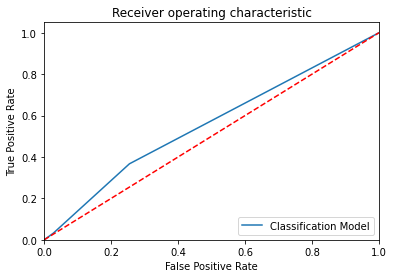

-----------------------------------------------------------------------------------------------------
KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[  49  417]
 [ 148 2260]]
Outcome values : 
 49 417 148 2260
Classification report : 
               precision    recall  f1-score   support

           1       0.25      0.11      0.15       466
           0       0.84      0.94      0.89      2408

    accuracy                           0.80      2874
   macro avg       0.55      0.52      0.52      2874
weighted avg       0.75      0.80      0.77      2874

Accuracy : 80.3 %
Precision : 24.9 %
Recall : 10.5 %
F1 Score : 0.148
Specificity or True Negative Rate : 93.9 %
Balanced Accuracy : 52.2 %
MCC : 0.064
roc_auc_score: 0.522


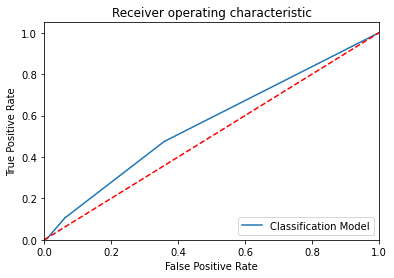

-----------------------------------------------------------------------------------------------------
KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[  18  448]
 [  45 2363]]
Outcome values : 
 18 448 45 2363
Classification report : 
               precision    recall  f1-score   support

           1       0.29      0.04      0.07       466
           0       0.84      0.98      0.91      2408

    accuracy                           0.83      2874
   macro avg       0.56      0.51      0.49      2874
weighted avg       0.75      0.83      0.77      2874

Accuracy : 82.8 %
Precision : 28.6 %
Recall : 3.9 %
F1 Score : 0.068
Specificity or True Negative Rate : 98.1 %
Balanced Accuracy : 51.0 %
MCC : 0.05
roc_auc_score: 0.51


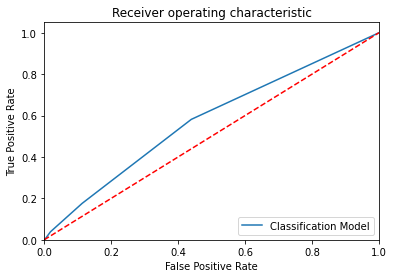

-----------------------------------------------------------------------------------------------------
KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[  37  429]
 [  95 2313]]
Outcome values : 
 37 429 95 2313
Classification report : 
               precision    recall  f1-score   support

           1       0.28      0.08      0.12       466
           0       0.84      0.96      0.90      2408

    accuracy                           0.82      2874
   macro avg       0.56      0.52      0.51      2874
weighted avg       0.75      0.82      0.77      2874

Accuracy : 81.8 %
Precision : 28.0 %
Recall : 7.9 %
F1 Score : 0.124
Specificity or True Negative Rate : 96.1 %
Balanced Accuracy : 52.0 %
MCC : 0.07
roc_auc_score: 0.52


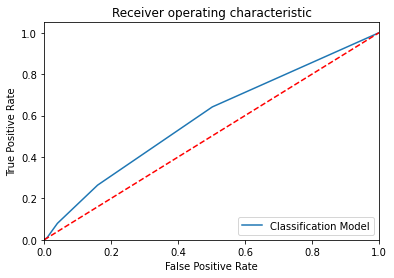

-----------------------------------------------------------------------------------------------------
KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[  12  454]
 [  37 2371]]
Outcome values : 
 12 454 37 2371
Classification report : 
               precision    recall  f1-score   support

           1       0.24      0.03      0.05       466
           0       0.84      0.98      0.91      2408

    accuracy                           0.83      2874
   macro avg       0.54      0.51      0.48      2874
weighted avg       0.74      0.83      0.77      2874

Accuracy : 82.9 %
Precision : 24.5 %
Recall : 2.6 %
F1 Score : 0.047
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 50.5 %
MCC : 0.03
roc_auc_score: 0.505


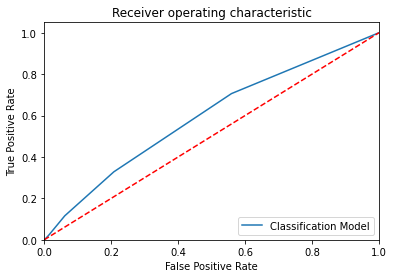

-----------------------------------------------------------------------------------------------------
KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[  18  448]
 [  58 2350]]
Outcome values : 
 18 448 58 2350
Classification report : 
               precision    recall  f1-score   support

           1       0.24      0.04      0.07       466
           0       0.84      0.98      0.90      2408

    accuracy                           0.82      2874
   macro avg       0.54      0.51      0.48      2874
weighted avg       0.74      0.82      0.77      2874

Accuracy : 82.4 %
Precision : 23.7 %
Recall : 3.9 %
F1 Score : 0.066
Specificity or True Negative Rate : 97.6 %
Balanced Accuracy : 50.7 %
MCC : 0.033
roc_auc_score: 0.507


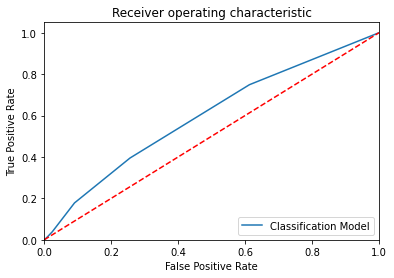

-----------------------------------------------------------------------------------------------------
KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[  12  454]
 [  22 2386]]
Outcome values : 
 12 454 22 2386
Classification report : 
               precision    recall  f1-score   support

           1       0.35      0.03      0.05       466
           0       0.84      0.99      0.91      2408

    accuracy                           0.83      2874
   macro avg       0.60      0.51      0.48      2874
weighted avg       0.76      0.83      0.77      2874

Accuracy : 83.4 %
Precision : 35.3 %
Recall : 2.6 %
F1 Score : 0.048
Specificity or True Negative Rate : 99.1 %
Balanced Accuracy : 50.8 %
MCC : 0.057
roc_auc_score: 0.508


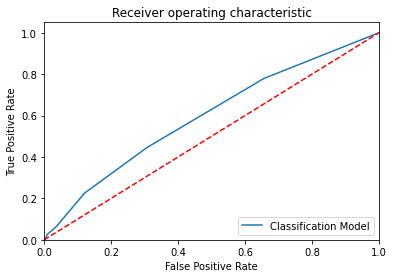

-----------------------------------------------------------------------------------------------------
KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[  23  443]
 [  42 2366]]
Outcome values : 
 23 443 42 2366
Classification report : 
               precision    recall  f1-score   support

           1       0.35      0.05      0.09       466
           0       0.84      0.98      0.91      2408

    accuracy                           0.83      2874
   macro avg       0.60      0.52      0.50      2874
weighted avg       0.76      0.83      0.77      2874

Accuracy : 83.1 %
Precision : 35.4 %
Recall : 4.9 %
F1 Score : 0.087
Specificity or True Negative Rate : 98.3 %
Balanced Accuracy : 51.6 %
MCC : 0.079
roc_auc_score: 0.516


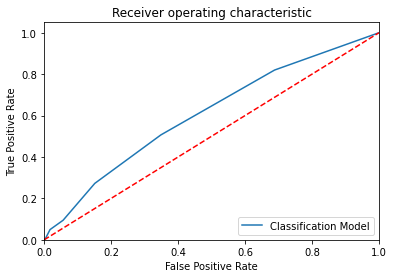

-----------------------------------------------------------------------------------------------------


In [16]:
# Initialize an array that stores the Accuracy

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 10, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    #--------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    loans_results = loans_results.append(new_row, ignore_index=True)
    #--------------------------------------------------------
    print('-----------------------------------------------------------------------------------------------------')

In [18]:
loans_results.to_csv("C:/Users/Admin/Downloads/Raju Sir DLS/KNN/LoanResultsnew.csv")

loans_results.head(10)

,Model Name,KNN K Value,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,0.759,0.239,0.223,0.231,0.862,0.088,0.542651,0.542
1,KNeighborsClassifier(n_neighbors=2),2,0.82,0.185,0.032,0.055,0.973,0.011,0.50239,0.502
2,KNeighborsClassifier(n_neighbors=3),3,0.803,0.249,0.105,0.148,0.939,0.064,0.521844,0.522
3,KNeighborsClassifier(n_neighbors=4),4,0.828,0.286,0.039,0.068,0.981,0.05,0.509969,0.51
4,KNeighborsClassifier(),5,0.818,0.28,0.079,0.124,0.961,0.07,0.519974,0.52
5,KNeighborsClassifier(n_neighbors=6),6,0.829,0.245,0.026,0.047,0.985,0.03,0.505193,0.505
6,KNeighborsClassifier(n_neighbors=7),7,0.824,0.237,0.039,0.066,0.976,0.033,0.50727,0.507
7,KNeighborsClassifier(n_neighbors=8),8,0.834,0.353,0.026,0.048,0.991,0.057,0.508307,0.508
8,KNeighborsClassifier(n_neighbors=9),9,0.831,0.354,0.049,0.087,0.983,0.079,0.515957,0.516
